In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

ipl_data = pd.read_csv("matches.csv")
ipl_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,Sunrisers Hyderabad,35.0,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0.0,Rising Pune Supergiant,0.0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0.0,Kolkata Knight Riders,0.0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0.0,Kings XI Punjab,0.0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0.0,Royal Challengers Bangalore,15.0,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [8]:
ipl_data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [9]:
missing_values = ipl_data.isna().sum()      # checking number of missing values in each column 
print(f"Number of missing values in each column:\n\n{missing_values}")
print()
Duplicate_rows = ipl_data.duplicated()  # Identifying duplicate rows
Total_duplicates = Duplicate_rows.sum()       # Counting the number of duplicate rows
print(f"Total number of duplicate rows: {Total_duplicates}")
print()
# Check the data type of the 'date' column
print(ipl_data['date'].dtype)


Number of missing values in each column:

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           1
winner               4
win_by_runs          6
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

Total number of duplicate rows: 0

object


In [29]:
# Fill missing values
ipl_data['city'].fillna('Unknown', inplace=True)
ipl_data['dl_applied'].fillna(0, inplace=True)
ipl_data['winner'].fillna('No Result', inplace=True)
ipl_data['win_by_runs'].fillna(0, inplace=True)
ipl_data['player_of_match'].fillna('Unknown', inplace=True)

ipl_data_cleaned = ipl_data.dropna()
# Drop columns
ipl_data.drop(columns=['umpire1', 'umpire2', 'umpire3'], errors = 'ignore', inplace=True)
ipl_data.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10608\71716139.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ipl_data['city'].fillna('Unknown', inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10608\71716139.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-05-04,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,Sunrisers Hyderabad,35.0,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-06-04,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0.0,Rising Pune Supergiant,0.0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-07-04,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0.0,Kolkata Knight Riders,0.0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-08-04,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0.0,Kings XI Punjab,0.0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,2017-08-04,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0.0,Royal Challengers Bangalore,15.0,0,KM Jadhav,M Chinnaswamy Stadium


In [30]:
# Convert the 'date' column to datetime format with the correct parameters
ipl_data['date'] = pd.to_datetime(ipl_data['date'], dayfirst=True, errors='coerce')

# Check the data type of the 'date' column
print(ipl_data['date'].dtype)  # Should print datetime64[ns]

# Display the first few rows to confirm the date formatting
ipl_data.head()

datetime64[ns]


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-05-04,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,Sunrisers Hyderabad,35.0,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-06-04,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0.0,Rising Pune Supergiant,0.0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-07-04,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0.0,Kolkata Knight Riders,0.0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-08-04,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0.0,Kings XI Punjab,0.0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,2017-08-04,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0.0,Royal Challengers Bangalore,15.0,0,KM Jadhav,M Chinnaswamy Stadium


player_of_match
CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: count, dtype: int64


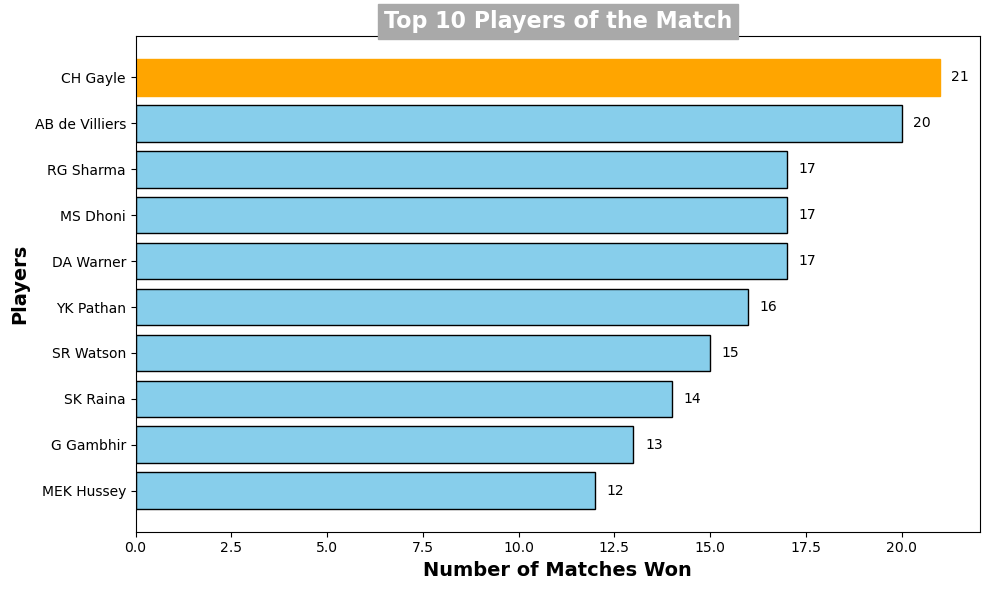

In [27]:
# Count the occurrences of each player in the 'player_of_match' column
top_players = ipl_data['player_of_match'].value_counts().head(10)

# Display the top players
print(top_players)


plt.figure(figsize=(10, 6))
bars = plt.barh(top_players.index, top_players.values, color='skyblue', edgecolor='black')

# Highlight the top player
bars[0].set_color('orange')

# Add titles and labels
plt.title('Top 10 Players of the Match', fontsize=16, fontweight='bold', color = 'white', backgroundcolor='darkgray')
plt.xlabel('Number of Matches Won', fontsize=14, fontweight='bold')
plt.ylabel('Players', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest values on top

# Add value labels to each bar
for bar in bars:
    plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width())}', va='center')

plt.tight_layout()
plt.show()


Match Wins:
 winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
No Result                        4
Name: count, dtype: int64

Total Matches:
 Mumbai Indians                 187
Royal Challengers Bangalore    180
Kolkata Knight Riders          178
Kings XI Punjab                176
Chennai Super Kings            164
Delhi Daredevils               161
Rajasthan Royals               147
Sunrisers Hyderabad            108
Deccan Chargers                 75
Pune Warriors                   46
Gujarat Lions              

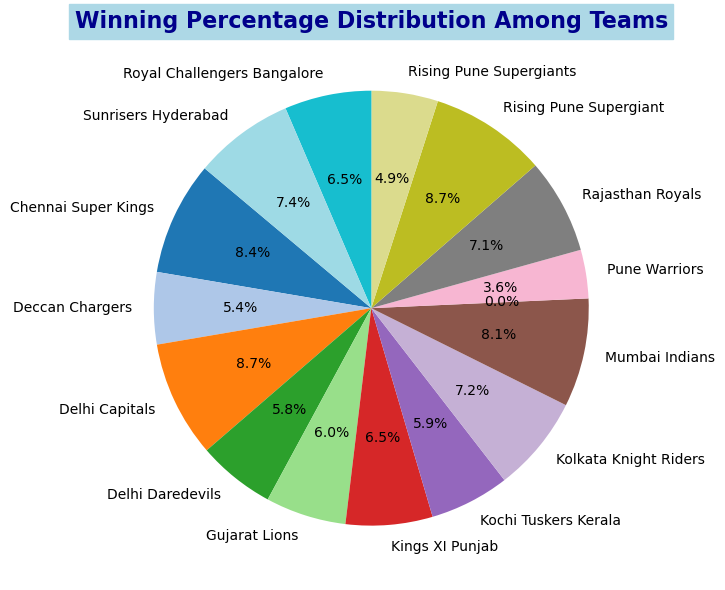

In [35]:
match_wins = ipl_data['winner'].value_counts()

total_matches = pd.concat([ipl_data['team1'], ipl_data['team2']]).value_counts()

winning_percentage = (match_wins / total_matches) * 100
winning_percentage = winning_percentage.fillna(0)  # Replace NaN values with 0

print("Match Wins:\n", match_wins)
print("\nTotal Matches:\n", total_matches)
print("\nWinning Percentage:\n", winning_percentage)


plt.figure(figsize=(10, 6))
winning_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='tab20')
plt.title('Winning Percentage Distribution Among Teams', fontsize=16, fontweight='bold', backgroundcolor='lightblue', color='darkblue')
plt.ylabel('')  # Hide the y-label for better aesthetics
plt.tight_layout()
plt.show()



In [62]:
import pandas as pd

# Load the dataset
ipl_data = pd.read_csv("matches.csv")

# Fill missing values
ipl_data['city'].fillna('Unknown', inplace=True)
ipl_data['dl_applied'].fillna(0, inplace=True)
ipl_data['winner'].fillna('No Result', inplace=True)
ipl_data['win_by_runs'].fillna(0, inplace=True)
ipl_data['player_of_match'].fillna('Unknown', inplace=True)

# Create home and away columns based on the 'city' and 'team1' columns
ipl_data['is_home_team'] = ipl_data.apply(lambda row: row['team1'] if row['city'] == row['team1'] else row['team2'], axis=1)
ipl_data['is_away_team'] = ipl_data.apply(lambda row: row['team2'] if row['is_home_team'] == row['team1'] else row['team1'], axis=1)

# Filter out 'Unknown' player_of_match values
ipl_data_filtered = ipl_data[ipl_data['player_of_match'] != 'Unknown']

# Assign Player of the Match to home or away column
ipl_data_filtered['home_player_of_match'] = ipl_data_filtered.apply(lambda row: row['player_of_match'] if row['winner'] == row['is_home_team'] else None, axis=1)
ipl_data_filtered['away_player_of_match'] = ipl_data_filtered.apply(lambda row: row['player_of_match'] if row['winner'] == row['is_away_team'] else None, axis=1)

# Count Player of the Match awards for home and away players
home_awards = ipl_data_filtered['home_player_of_match'].dropna().value_counts()
away_awards = ipl_data_filtered['away_player_of_match'].dropna().value_counts()

# Combine the counts and calculate total awards
total_awards = home_awards.add(away_awards, fill_value=0).sort_values(ascending=False)

# Display the top players with the most awards both home and away
consistent_players = total_awards.head(10)
print("Top Players with Most Awards (Home + Away):\n", consistent_players)



Top Players with Most Awards (Home + Away):
 CH Gayle          21.0
AB de Villiers    20.0
MS Dhoni          17.0
DA Warner         17.0
RG Sharma         17.0
YK Pathan         16.0
SR Watson         15.0
SK Raina          14.0
G Gambhir         13.0
MEK Hussey        12.0
Name: count, dtype: float64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10608\376454695.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ipl_data['city'].fillna('Unknown', inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10608\376454695.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

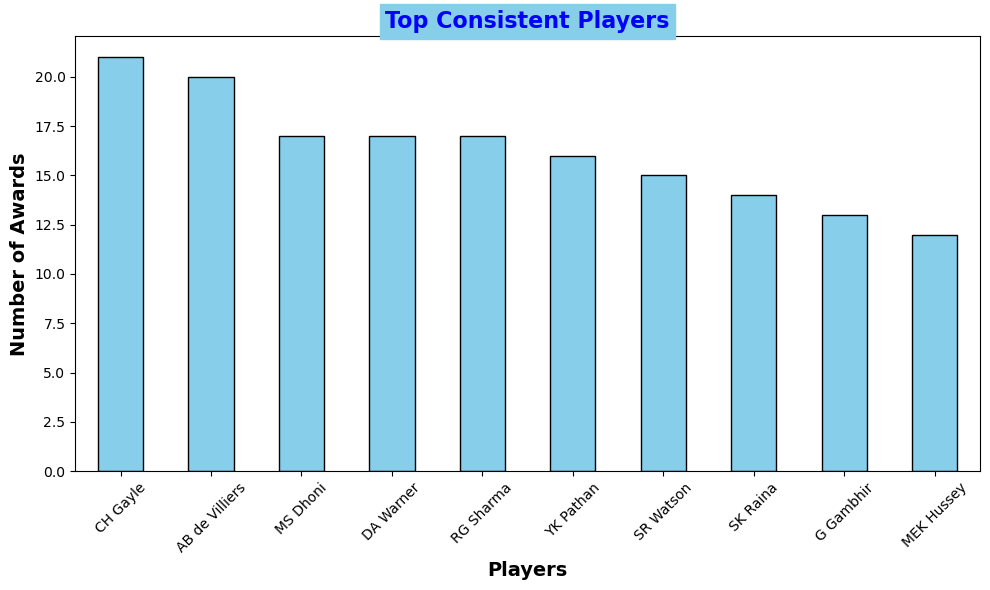

In [67]:
plt.figure(figsize=(10, 6))
consistent_players.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top Consistent Players', fontsize=16, fontweight='bold',color='blue', backgroundcolor = 'skyblue')
plt.xlabel('Players', fontsize=14, fontweight='bold')
plt.ylabel('Number of Awards', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()